##importamos las librerías

In [ ]:
#Importamos las biblioteas de datos y visualizacion.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score ,  classification_report , confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

##cargamos los datos

In [ ]:
#Cagamos y exploramos los datos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta = "/content/drive/MyDrive/adult_data.csv"

In [ ]:
pd.read_csv(ruta)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
adult_data=pd.read_csv(ruta)

In [ ]:
#Mostramos los nombres de las columnas
print (adult_data.columns)

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' salary'],
      dtype='object')


##EXPLORACIONDE DATOS

In [ ]:
print (adult_data.info)

<bound method DataFrame.info of        age          workclass   fnlwgt    education   education-num  \
0       39          State-gov    77516    Bachelors              13   
1       50   Self-emp-not-inc    83311    Bachelors              13   
2       38            Private   215646      HS-grad               9   
3       53            Private   234721         11th               7   
4       28            Private   338409    Bachelors              13   
...    ...                ...      ...          ...             ...   
32556   27            Private   257302   Assoc-acdm              12   
32557   40            Private   154374      HS-grad               9   
32558   58            Private   151910      HS-grad               9   
32559   22            Private   201490      HS-grad               9   
32560   52       Self-emp-inc   287927      HS-grad               9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-cle

In [ ]:
# Verificar las primeras filas del conjunto de datos
print (adult_data.head(6))

   age          workclass   fnlwgt   education   education-num  \
0   39          State-gov    77516   Bachelors              13   
1   50   Self-emp-not-inc    83311   Bachelors              13   
2   38            Private   215646     HS-grad               9   
3   53            Private   234721        11th               7   
4   28            Private   338409   Bachelors              13   
5   37            Private   284582     Masters              14   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
5   Married-civ-spouse     Exec-managerial            Wife   Wh

In [ ]:
# Verificar valores faltantes
print(adult_data.isnull().sum())

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 salary            0
dtype: int64


In [ ]:
# Estadísticas de resumen de características numéricas
print (adult_data.describe())

                age        fnlwgt   education-num   capital-gain  \
count  32561.000000  3.256100e+04    32561.000000   32561.000000   
mean      38.581647  1.897784e+05       10.080679    1077.648844   
std       13.640433  1.055500e+05        2.572720    7385.292085   
min       17.000000  1.228500e+04        1.000000       0.000000   
25%       28.000000  1.178270e+05        9.000000       0.000000   
50%       37.000000  1.783560e+05       10.000000       0.000000   
75%       48.000000  2.370510e+05       12.000000       0.000000   
max       90.000000  1.484705e+06       16.000000   99999.000000   

        capital-loss   hours-per-week  
count   32561.000000     32561.000000  
mean       87.303830        40.437456  
std       402.960219        12.347429  
min         0.000000         1.000000  
25%         0.000000        40.000000  
50%         0.000000        40.000000  
75%         0.000000        45.000000  
max      4356.000000        99.000000  


In [ ]:
adult_data.rename(columns={'salary': 'salary'}, inplace=True)#renmbre el nombre salary por error

In [ ]:
print (adult_data.columns)

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' salary'],
      dtype='object')


##ANALISIS EXPLORATORIOS

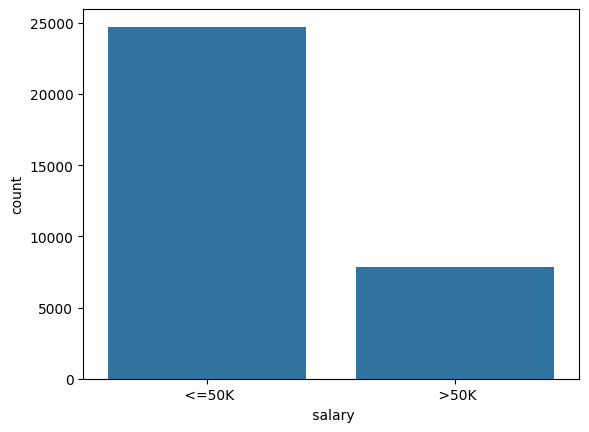

In [ ]:
# Gráfico de recuento de distribución salarial
sns.countplot(x=' salary', data=adult_data)
plt.show()


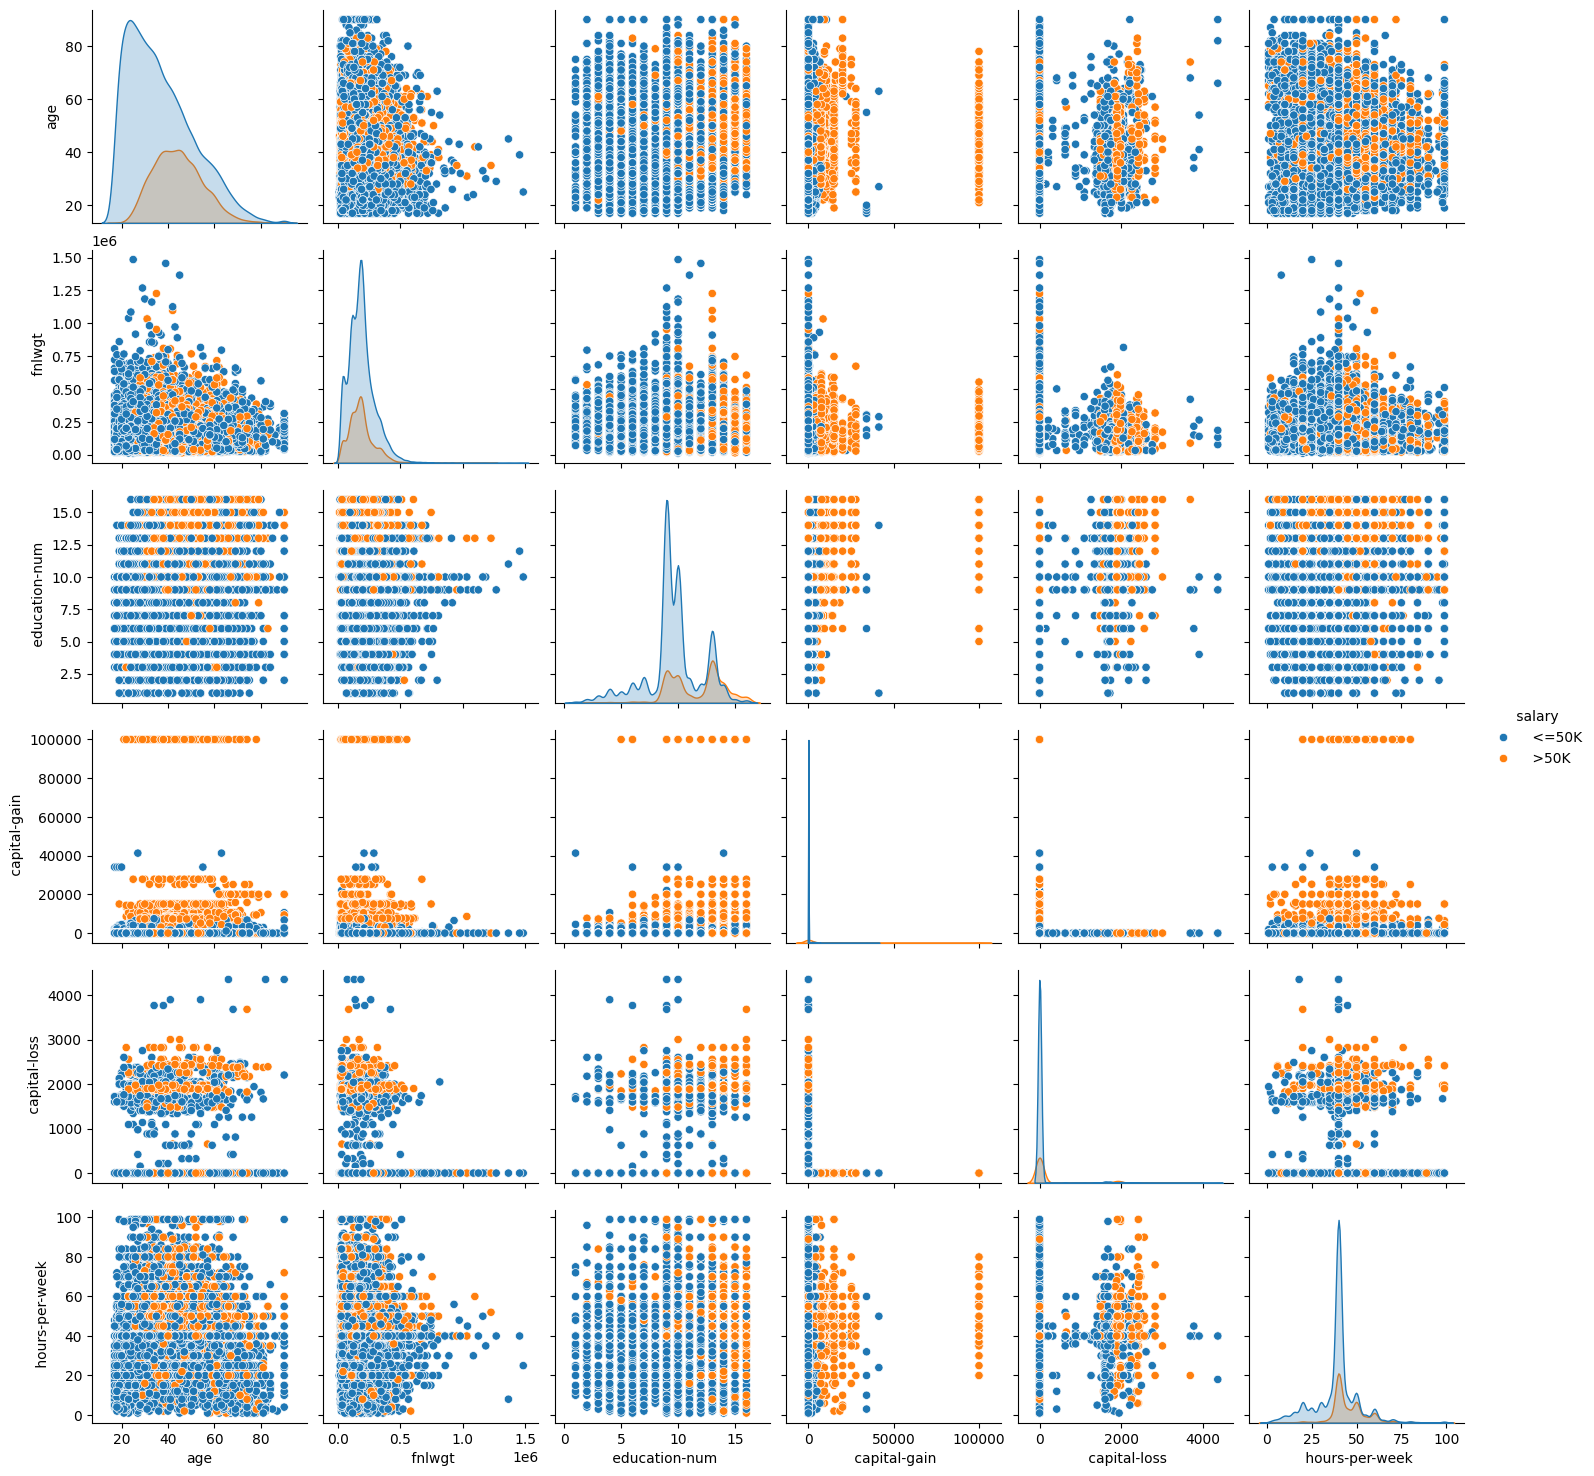

In [ ]:
# Gráfico de pares para observar relaciones
sns.pairplot(adult_data, hue=' salary')
plt.show()


##PROCESAMIENTO DE DATOS

In [ ]:
# Codificar variables categóricas
label_encoder = LabelEncoder()
categorical_columns = [ ' workclass' , ' education' , ' marital-status' , ' occupation' , ' relationship' , ' race' , ' sex' , ' native-country' ]

for col in categorical_columns:
    adult_data [col] = label_encoder.fit_transform( adult_data [col])

# Escalar características numéricas
scaler = StandardScaler()
numerical_columns = [ 'age' , ' hours-per-week' ]
adult_data [numerical_columns] = scaler.fit_transform( adult_data [numerical_columns])

# Separar características y objetivo
X = adult_data .drop( ' salary' , axis= 1 )
y = adult_data [ ' salary' ]

# Dividir los datos en conjuntos de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3 , random_state= 42 )

KeyError: ' workclass'

##SELECCION Y ENTRETENIMIENTO DE MODELO

In [ ]:
# Inicializar y entrenar el clasificador Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

##evalucion del modelo

precision: 73.53 %
Informe de clasificación:
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7455
        >50K       0.74      0.63      0.68      2314

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.85      0.86      0.85      9769



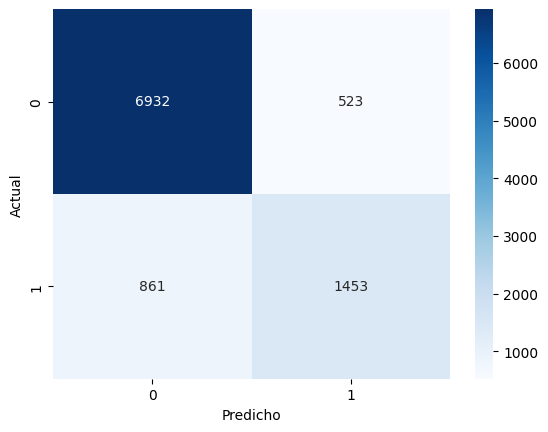

In [ ]:
# Puntuación de precisión
precision = precision_score(y_test, y_pred, pos_label=' >50K')
print ( f'precision: {precision * 100 :.2f} %' )  # Removed the space in the format specifier
# Informe de clasificación
print ( 'Informe de clasificación:' )
print (classification_report(y_test, y_pred)) # Assuming informe_de_clasificación is classification_report
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot= True , fmt= 'd' , cmap= 'Blues' )
plt.xlabel( 'Predicho' )
plt.ylabel( 'Actual' )
plt.show()

In [ ]:
# Limpiar los nombres de las columnas (por si tienen espacios)
adult_data.columns = adult_data.columns.str.strip()

# Imprimir los nombres de las columnas para verificar
print("Nombres de las columnas disponibles:", adult_data.columns)

# Seleccionar columnas numéricas relevantes y objetivo
numerical_columns = ['age']  # Cambiar si hay más predictores disponibles
target_column = 'education-num'  # Cambiar por la variable objetivo correcta

# Verificar si las columnas existen en el DataFrame
for col in numerical_columns + [target_column]:
    if col not in adult_data.columns:
        raise ValueError(f"La columna '{col}' no se encuentra en el DataFrame.")

# Separar características (X) y objetivo (y)
X = adult_data[numerical_columns]
y = adult_data[target_column]

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Medio Absoluto (MAE): {mae:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

# Mostrar coeficientes del modelo
print("Coeficientes:", model.coef_)
print("Intersección (Intercept):", model.intercept_)


Nombres de las columnas disponibles: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')
Error Medio Absoluto (MAE): 1.89
Coeficiente de determinación (R²): 0.00
Coeficientes: [0.00781292]
Intersección (Intercept): 9.789886953011075


##ajuste del modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score

# Definición del clasificador
clf = RandomForestClassifier(random_state=42)

# Definición de la cuadrícula de parámetros
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Inicializamos RandomizedSearchCV
random_search = RandomizedSearchCV(
    clf, param_distributions=param_grid,
    cv=5, verbose=2, n_jobs=-1, n_iter=20, random_state=42
)

# Ajustamos el modelo
random_search.fit(X_train, y_train)

# Mejores parámetros encontrados
print(f'Best Parameters: {random_search.best_params_}')

# Modelo con mejores parámetros
best_model = random_search.best_estimator_

# Predicciones y evaluación del modelo
y_pred_best = best_model.predict(X_test)
precision_best = precision_score(y_test, y_pred_best, pos_label=' >50K')  # Asegúrate que coincide con tus datos
print(f'Optimized Precision: {precision_best * 100:.2f} %')


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}
Optimized Precision: 75.87 %


##fin colab


JOAQUIN ANDRES CALLE MALCA
LUCIA BARBARA
PATRIK ALA
BRUNO CHOIS

##fin1

##fin2

##fin3

##fin4